# **Don't Get Kicked!**

![image.png](https://creditkarma-cms.imgix.net/wp-content/uploads/2019/08/how-to-buy-cars-auction_519515713.jpg?fm=webp)

Hello, in this project we will be doing an EDA on [Don't Get Kicked!](https://www.kaggle.com/c/DontGetKicked/data) dataset from Kaggle, and then using applied machine learning models to predict or classify if a car purchased at auction is a lemon (not a good purchase, no puns intended).


### **Let's start by installing required libraries**

In [78]:
!pip install  pandas numpy seaborn matplotlib plotly --quiet

## **Loading the dataset**

In [79]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./DontGetKicked/training.csv')
test_df = pd.read_csv('./DontGetKicked/test.csv')
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [81]:
list(train_df.AUCGUART.unique())


[nan, 'GREEN', 'RED']

In [82]:
train_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [83]:
train_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [84]:
test_df.sample(5)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
36792,109823,9/10/2010,OTHER,2006,4,CHEVROLET,MALIBU 4C,LT,4D SEDAN LT,MAROON,...,11597.0,14636.0,NaN,NaN,99750,90650,CA,6600.0,0,923
43498,116533,2/24/2009,MANHEIM,2005,4,CHEVROLET,IMPALA 3.8L V6 SFI,LS,4D SEDAN LS,RED,...,NaN,NaN,NaN,NaN,18880,28625,NC,6330.0,0,2152
19802,92825,12/7/2010,MANHEIM,2006,4,CHRYSLER,PT CRUISER,Bas,4D SEDAN,BLACK,...,7857.0,8632.0,NaN,NaN,8172,30331,GA,5010.0,0,1389
41091,114123,2/19/2009,MANHEIM,2005,4,CHRYSLER,SEBRING V6 2.7L V6 M,Tou,4D SEDAN LXI,GREY,...,NaN,NaN,NaN,NaN,23359,92337,CA,6085.0,0,1118
26097,99123,3/10/2009,MANHEIM,2007,2,CHEVROLET,IMPALA V6 3.5L V6 SF,LT,4D SEDAN LT 3.5L,RED,...,10050.0,11639.0,NaN,NaN,20740,19440,PA,7480.0,0,1974


In [85]:
submission_df.head()

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [87]:
train_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [88]:
train_df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA



*   The columns PRIMEUNIT, AUCGUART contain soo many missing values so we cannot simply drop them as that would result in too much loss of data, so we will not be considering these two columns for our project.



## **Expolatory Data Analysis**



> Importing necessary libraries for visual and numerical analysis



In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 15
matplotlib.rcParams['figure.figsize']= (10, 5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [90]:
train_df.IsBadBuy

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

In [91]:
train_df[['IsBadBuy','VehYear']]

,IsBadBuy,VehYear
0,0,2006
1,0,2004
2,0,2005
3,0,2004
4,0,2005
...,...,...
72978,1,2001
72979,0,2007
72980,0,2005
72981,0,2006


In [92]:
train_df[train_df.IsBadBuy == 1].groupby(by=['VehYear',]).count()[['IsBadBuy']]

,IsBadBuy
VehYear,
2001,426
2002,818
2003,1210
2004,1587
2005,2032
2006,1600
2007,888
2008,385
2009,30


In [93]:
train_df[train_df.IsBadBuy == 0].groupby(by=['VehYear',]).count()[['IsBadBuy']]

,IsBadBuy
VehYear,
2001,1055
2002,2587
2003,5017
2004,8620
2005,13457
2006,15443
2007,10535
2008,6500
2009,792


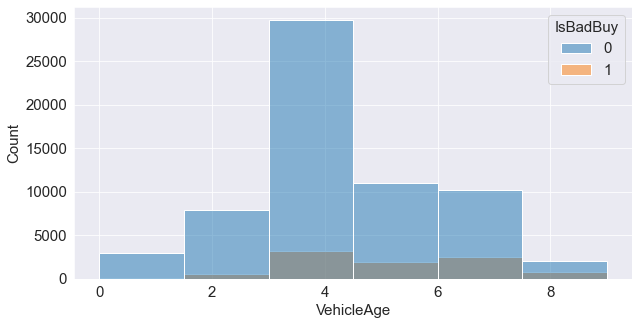

In [94]:
sns.histplot(x='VehicleAge', data=train_df, hue='IsBadBuy',bins=6);

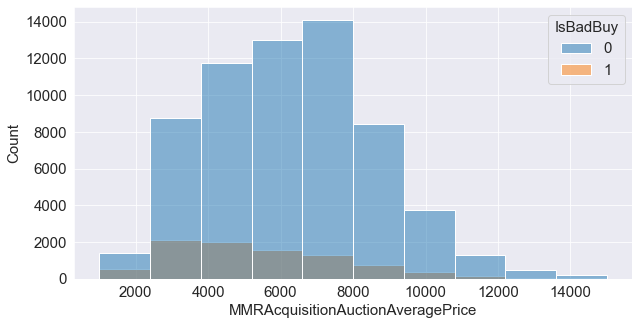

In [95]:
sns.histplot(x='MMRAcquisitionAuctionAveragePrice',data=train_df,hue='IsBadBuy',bins=10,binrange=(1000,15000));

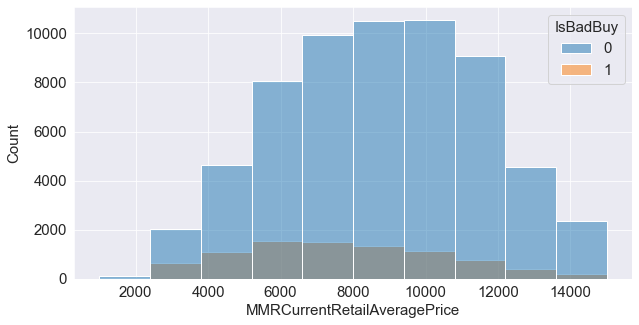

In [96]:
sns.histplot(x='MMRCurrentRetailAveragePrice',data=train_df,hue='IsBadBuy',bins=10,binrange=(1000,15000));

In [97]:
len(train_df.Make.unique())

33

In [98]:
#car manufacturing companies
train_df.groupby(by='Make',as_index=False).count()['Make']

0            ACURA
1            BUICK
2         CADILLAC
3        CHEVROLET
4         CHRYSLER
5            DODGE
6             FORD
7              GMC
8            HONDA
9           HUMMER
10         HYUNDAI
11        INFINITI
12           ISUZU
13            JEEP
14             KIA
15           LEXUS
16         LINCOLN
17           MAZDA
18         MERCURY
19            MINI
20      MITSUBISHI
21          NISSAN
22      OLDSMOBILE
23        PLYMOUTH
24         PONTIAC
25          SATURN
26           SCION
27          SUBARU
28          SUZUKI
29          TOYOTA
30    TOYOTA SCION
31      VOLKSWAGEN
32           VOLVO
Name: Make, dtype: object

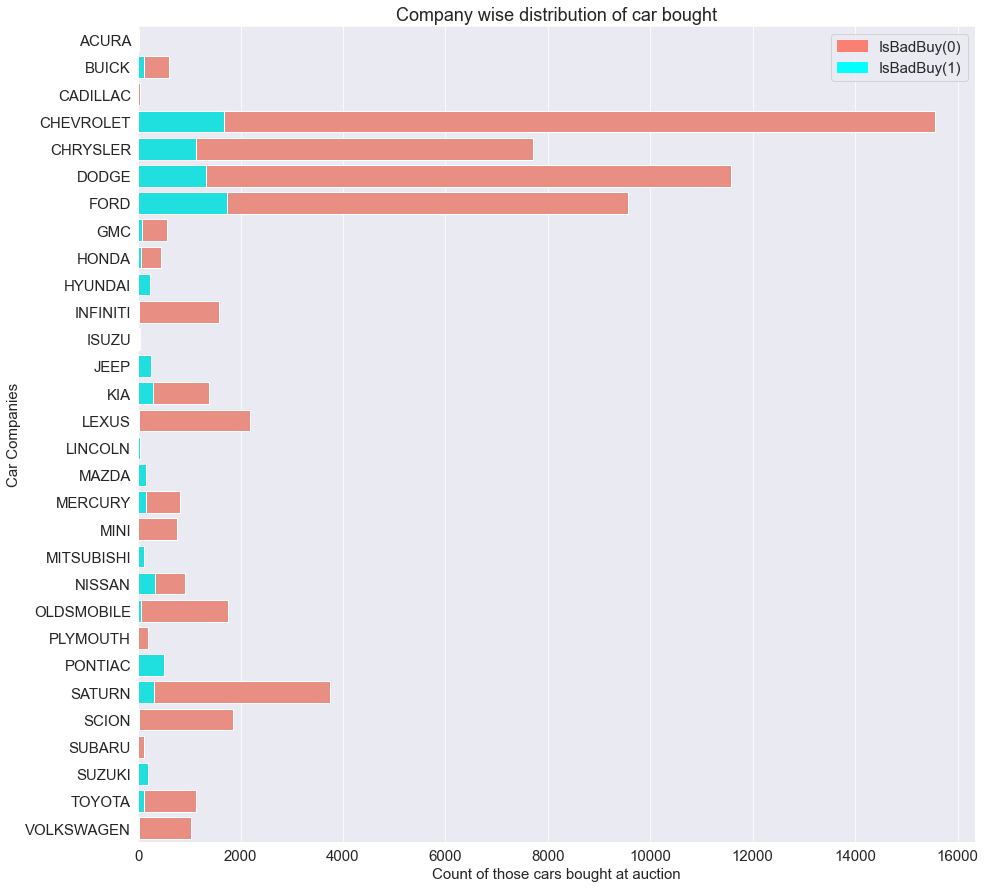

In [99]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15,15))
sns.barplot(x=train_df[train_df.IsBadBuy == 0].groupby(by='Make',as_index=False).count().Color,y=train_df[train_df.IsBadBuy == 0].groupby(by='Make').count().index, color='salmon'
,label='dd')
sns.barplot(x=train_df[train_df.IsBadBuy == 1].groupby(by='Make',as_index=False).count().Color,y=train_df[train_df.IsBadBuy == 1].groupby(by='Make').count().index,color='cyan',label='abc');

plt.ylabel('Car Companies')
plt.xlabel('Count of those cars bought at auction');
plt.title('Company wise distribution of car bought')

salmon_patch = mpatches.Patch(color='salmon', label='IsBadBuy(0)')
cyan_patch = mpatches.Patch(color='cyan', label='IsBadBuy(1)')

plt.legend(handles=[salmon_patch,cyan_patch]);

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [101]:
train_df.Auction.unique()

array(['ADESA', 'OTHER', 'MANHEIM'], dtype=object)

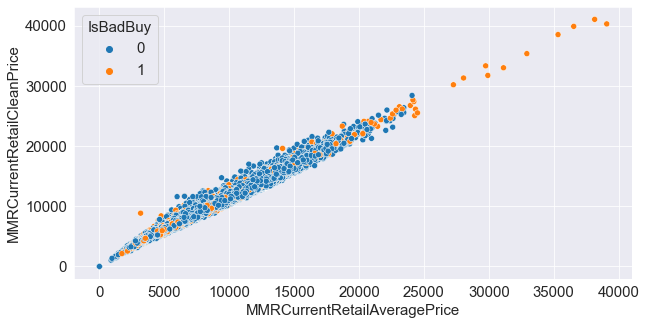

In [102]:
sns.scatterplot(x='MMRCurrentRetailAveragePrice',y='MMRCurrentRetailCleanPrice',hue='IsBadBuy',data=train_df);

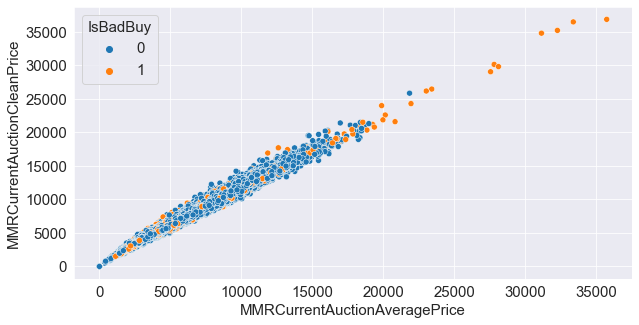

In [103]:
sns.scatterplot(x='MMRCurrentAuctionAveragePrice',y='MMRCurrentAuctionCleanPrice',hue='IsBadBuy', data=train_df,);

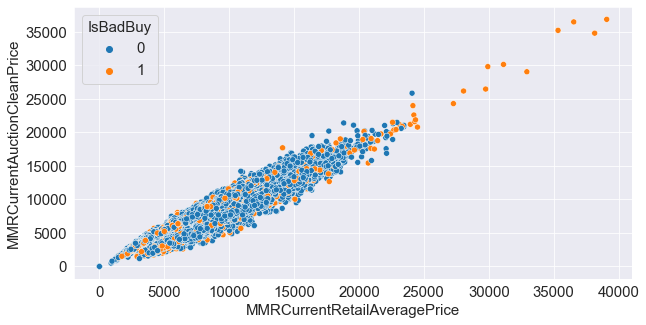

In [104]:
sns.scatterplot(x='MMRCurrentRetailAveragePrice', y='MMRCurrentAuctionCleanPrice',hue='IsBadBuy',data=train_df);

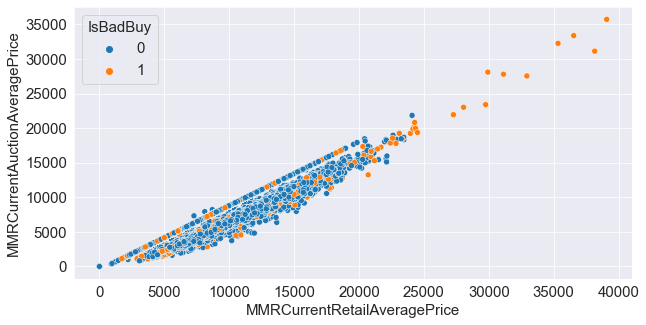

In [105]:
sns.scatterplot(x='MMRCurrentRetailAveragePrice', y='MMRCurrentAuctionAveragePrice',hue='IsBadBuy',data=train_df);



>  Inferences Drawn from Visual Analysis


*   In the years 2003, 2004 and 2005 most cars bought were not a good purchase.

*   In the years 2004, 2005, 2005, 2006 and 2007 most cars bought were good purchase.
*   Vehicles bought that were older than 4-6 years were not purchase.

*   2000+ cars bought at auction whose MMRAcquisitionAuctionAveragePrice(Acquisition price for this vehicle in average condition at time of purchase) was between 3000-9000 were a bad buy others were good buy.

*   1800+ cars bought at auction whose MMRCurrentRetailAveragePrice (Acquisition price for this vehicle in the retail market in average condition as of current day) was between 6000-11000 were a bad buy others were good buy.





## **Pereparing the dataset for training**

## **Date**

In [106]:
def extract_year(df):
  df['Date'] = pd.to_datetime(df.PurchDate)
  df['PurchaseYear'] = df.Date.dt.year
  df['PurchaseMonth'] = df.Date.dt.month
  df['PurchaseDay'] = df.Date.dt.day
  return df

In [107]:
extract_year(train_df)
extract_year(test_df)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Date,PurchaseYear,PurchaseMonth,PurchaseDay
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,18881,30212,GA,6500.0,0,2152,2009-12-02,2009,12,2
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,18111,30212,GA,6300.0,0,1118,2009-12-02,2009,12,2
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,18111,30212,GA,9700.0,0,1215,2009-12-02,2009,12,2
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,18881,30212,GA,4150.0,0,1933,2009-12-02,2009,12,2
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,18111,30212,GA,4100.0,0,920,2009-12-02,2009,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,20928,33411,FL,7955.0,0,1633,2010-11-17,2010,11,17
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,20928,33411,FL,7035.0,0,594,2010-11-17,2010,11,17
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,20928,33411,FL,6335.0,0,594,2010-11-17,2010,11,17
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,20928,33411,FL,8055.0,0,1038,2010-11-17,2010,11,17


In [108]:
train_df.sample(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Date,PurchaseYear,PurchaseMonth,PurchaseDay
15960,15971,0,10/27/2009,MANHEIM,2006,3,FORD,TAURUS 3.0L V6 EFI,SEL,4D SEDAN SEL,...,19662,77041,TX,5530.0,0,754,2009-10-27,2009,10,27
30132,30153,0,6/16/2010,MANHEIM,2006,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,...,20928,32824,FL,6750.0,0,2152,2010-06-16,2010,6,16
67201,67233,1,1/27/2010,ADESA,2005,5,SUZUKI,FORENZA,S,4D SEDAN,...,18822,77086,TX,5200.0,0,533,2010-01-27,2010,1,27
37979,38002,0,6/19/2009,MANHEIM,2006,3,FORD,TAURUS 3.0L V6 EFI,SE,4D SEDAN SE,...,22916,89165,NV,4185.0,0,1053,2009-06-19,2009,6,19
18178,18190,0,7/28/2010,MANHEIM,2006,4,KIA,OPTIMA V6,EX,4D SEDAN EX,...,21973,32824,FL,6050.0,0,671,2010-07-28,2010,7,28


## **Identifying Input and Target Columns**

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  object        
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                             

In [110]:
train_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Date',
       'PurchaseYear', 'PurchaseMonth', 'PurchaseDay'],
      dtype='object')

In [111]:
input_cols = ['Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice','BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'PurchaseYear', 'PurchaseMonth', 'PurchaseDay']

target_col = 'IsBadBuy' 

In [112]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

## **Train Test Validation Splits**

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
train_val_df, test_split_df = train_test_split(train_df, test_size=0.141, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.16, random_state=42)

In [115]:
test_split_df.shape

(10291, 38)

In [116]:
train_df.sample()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Date,PurchaseYear,PurchaseMonth,PurchaseDay
72044,72076,0,4/22/2010,ADESA,2006,4,FORD,TAURUS,SE,4D SEDAN SE,...,22916,80817,CO,6205.0,0,825,2010-04-22,2010,4,22


In [117]:
test_inputs = test_df[input_cols].copy()

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52661 entries, 55760 to 28804
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              52661 non-null  int64         
 1   IsBadBuy                           52661 non-null  int64         
 2   PurchDate                          52661 non-null  object        
 3   Auction                            52661 non-null  object        
 4   VehYear                            52661 non-null  int64         
 5   VehicleAge                         52661 non-null  int64         
 6   Make                               52661 non-null  object        
 7   Model                              52661 non-null  object        
 8   Trim                               50966 non-null  object        
 9   SubModel                           52655 non-null  object        
 10  Color                         

In [119]:
numeric = list(train_df.select_dtypes(include=np.number))
cats = list(train_df.select_dtypes(include='object'))

In [120]:
numeric

['RefId',
 'IsBadBuy',
 'VehYear',
 'VehicleAge',
 'WheelTypeID',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'PurchaseYear',
 'PurchaseMonth',
 'PurchaseDay']

In [121]:
train_df.WheelType.value_counts()

Alloy      25979
Covers     23812
Special      545
Name: WheelType, dtype: int64

In [122]:
numeric_cols = [ 'VehYear','VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
                 'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
                 'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','BYRNO','VNZIP1','VehBCost','IsOnlineSale','WarrantyCost','PurchaseYear',
                 'PurchaseMonth','PurchaseDay']

categorical_cols = ['Auction','Color','Transmission','WheelType', 'Nationality','Size','TopThreeAmericanName', 'VNST' ]

## **Imputing Missing Numerical Data**

In [123]:
inputs[numeric_cols].isna().sum()

VehYear                                0
VehicleAge                             0
VehOdo                                 0
MMRAcquisitionAuctionAveragePrice     18
MMRAcquisitionAuctionCleanPrice       18
MMRAcquisitionRetailAveragePrice      18
MMRAcquisitonRetailCleanPrice         18
MMRCurrentAuctionAveragePrice        315
MMRCurrentAuctionCleanPrice          315
MMRCurrentRetailAveragePrice         315
MMRCurrentRetailCleanPrice           315
BYRNO                                  0
VNZIP1                                 0
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
PurchaseYear                           0
PurchaseMonth                          0
PurchaseDay                            0
dtype: int64

In [124]:
from sklearn.impute import SimpleImputer

In [125]:
imputer = SimpleImputer(strategy='mean',verbose=1).fit(inputs[numeric_cols])

c:\Users\archa\miniconda3\envs\ds\lib\site-packages\sklearn\impute\_base.py:337: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [126]:
inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])
train_df[numeric_cols] = imputer.transform(train_df[numeric_cols])
val_df[numeric_cols] = imputer.transform(val_df[numeric_cols])
test_split_df[numeric_cols] = imputer.transform(test_split_df[numeric_cols])

test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [127]:
inputs[numeric_cols]

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchaseYear,PurchaseMonth,PurchaseDay
0,2006.0,3.0,89046.0,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973.0,33619.0,7100.0,0.0,1113.0,2009.0,12.0,7.0
1,2004.0,5.0,93593.0,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638.0,33619.0,7600.0,0.0,1053.0,2009.0,12.0,7.0
2,2005.0,4.0,73807.0,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638.0,33619.0,4900.0,0.0,1389.0,2009.0,12.0,7.0
3,2004.0,5.0,65617.0,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638.0,33619.0,4100.0,0.0,630.0,2009.0,12.0,7.0
4,2005.0,4.0,69367.0,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638.0,33619.0,4000.0,0.0,1020.0,2009.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,2001.0,8.0,45234.0,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111.0,30212.0,4200.0,0.0,993.0,2009.0,12.0,2.0
72979,2007.0,2.0,71759.0,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881.0,30212.0,6200.0,0.0,1038.0,2009.0,12.0,2.0
72980,2005.0,4.0,88500.0,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111.0,30212.0,8200.0,0.0,1893.0,2009.0,12.0,2.0
72981,2006.0,3.0,79554.0,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881.0,30212.0,7000.0,0.0,1974.0,2009.0,12.0,2.0


In [128]:
inputs[numeric_cols].isna().sum()

VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
PurchaseYear                         0
PurchaseMonth                        0
PurchaseDay                          0
dtype: int64

## **Scaling Numerical Features**

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [131]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])
val_df[numeric_cols] = scaler.transform(val_df[numeric_cols])
test_split_df[numeric_cols] = scaler.transform(test_split_df[numeric_cols])

test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [132]:
inputs[numeric_cols].sample(5)

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchaseYear,PurchaseMonth,PurchaseDay
10940,0.555556,0.333333,0.610450,0.197441,0.232806,0.207702,0.235452,0.182493,0.208253,0.256551,0.273245,0.182409,0.256873,0.178125,0.0,0.214895,0.0,0.909091,0.033333
10633,0.333333,0.666667,0.679643,0.094256,0.123498,0.174335,0.196591,0.090756,0.119048,0.169012,0.190979,0.181823,0.770029,0.136008,0.0,0.240193,1.0,0.454545,0.233333
13116,0.444444,0.555556,0.690311,0.140642,0.165170,0.226510,0.242370,0.147752,0.187960,0.224514,0.256466,0.189879,0.256873,0.125341,0.0,0.166430,1.0,0.909091,0.700000
68240,0.222222,0.666667,0.699960,0.230782,0.267506,0.240635,0.268767,0.196294,0.226105,0.283572,0.302762,0.026464,0.809175,0.211335,0.0,0.135162,0.0,0.727273,0.766667
29280,0.777778,0.111111,0.428606,0.243155,0.252449,0.252840,0.254303,0.213090,0.222225,0.287103,0.289879,1.000000,0.739903,0.167129,0.0,0.065094,0.0,0.818182,0.133333


## **Encoding Categorical Features**

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [134]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(inputs[categorical_cols])

In [135]:
encoder.get_feature_names_out(categorical_cols)

array(['Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'Color_BEIGE',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD',
       'Color_GREEN', 'Color_GREY', 'Color_MAROON', 'Color_NOT AVAIL',
       'Color_ORANGE', 'Color_OTHER', 'Color_PURPLE', 'Color_RED',
       'Color_SILVER', 'Color_WHITE', 'Color_YELLOW', 'Color_nan',
       'Transmission_AUTO', 'Transmission_MANUAL', 'Transmission_Manual',
       'Transmission_nan', 'WheelType_Alloy', 'WheelType_Covers',
       'WheelType_Special', 'WheelType_nan', 'Nationality_AMERICAN',
       'Nationality_OTHER', 'Nationality_OTHER ASIAN',
       'Nationality_TOP LINE ASIAN', 'Nationality_nan', 'Size_COMPACT',
       'Size_CROSSOVER', 'Size_LARGE', 'Size_LARGE SUV',
       'Size_LARGE TRUCK', 'Size_MEDIUM', 'Size_MEDIUM SUV',
       'Size_SMALL SUV', 'Size_SMALL TRUCK', 'Size_SPECIALTY',
       'Size_SPORTS', 'Size_VAN', 'Size_nan',
       'TopThreeAmericanName_CHRYSLER', 'TopThreeAmericanName_FORD',
       'TopThreeAmerica

In [136]:
encoded_cols = encoder.get_feature_names_out(categorical_cols).tolist()

In [137]:
encoded_cols

['Auction_ADESA',
 'Auction_MANHEIM',
 'Auction_OTHER',
 'Color_BEIGE',
 'Color_BLACK',
 'Color_BLUE',
 'Color_BROWN',
 'Color_GOLD',
 'Color_GREEN',
 'Color_GREY',
 'Color_MAROON',
 'Color_NOT AVAIL',
 'Color_ORANGE',
 'Color_OTHER',
 'Color_PURPLE',
 'Color_RED',
 'Color_SILVER',
 'Color_WHITE',
 'Color_YELLOW',
 'Color_nan',
 'Transmission_AUTO',
 'Transmission_MANUAL',
 'Transmission_Manual',
 'Transmission_nan',
 'WheelType_Alloy',
 'WheelType_Covers',
 'WheelType_Special',
 'WheelType_nan',
 'Nationality_AMERICAN',
 'Nationality_OTHER',
 'Nationality_OTHER ASIAN',
 'Nationality_TOP LINE ASIAN',
 'Nationality_nan',
 'Size_COMPACT',
 'Size_CROSSOVER',
 'Size_LARGE',
 'Size_LARGE SUV',
 'Size_LARGE TRUCK',
 'Size_MEDIUM',
 'Size_MEDIUM SUV',
 'Size_SMALL SUV',
 'Size_SMALL TRUCK',
 'Size_SPECIALTY',
 'Size_SPORTS',
 'Size_VAN',
 'Size_nan',
 'TopThreeAmericanName_CHRYSLER',
 'TopThreeAmericanName_FORD',
 'TopThreeAmericanName_GM',
 'TopThreeAmericanName_OTHER',
 'TopThreeAmericanNam

In [138]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])
val_df[encoded_cols] = encoder.transform(val_df[categorical_cols])
test_split_df[encoded_cols] = encoder.transform(test_split_df[categorical_cols])

test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [139]:
inputs[encoded_cols]

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72979,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
train_df['IsBadBuy']

55760    0
36115    0
70549    0
15961    0
6381     0
        ..
48925    0
49124    0
72353    0
11602    0
28804    0
Name: IsBadBuy, Length: 52661, dtype: int64

In [141]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

train_inputs = train_df[numeric_cols + encoded_cols]
train_targets = train_df[target_col]


val_inputs = val_df[numeric_cols + encoded_cols]
val_targets = val_df[target_col]

test_split_inputs = test_split_df[numeric_cols + encoded_cols]
test_split_targets = test_split_df[target_col]

In [142]:
print('Test_split_inputs:',test_split_inputs.shape)
print('Test_split_targets:',test_split_targets.shape)
print('Train_inputs:',train_inputs.shape)
print('Train_targets:',train_targets.shape)
print('Val_inputs:',val_inputs.shape)
print('Val_targets:',val_targets.shape)
print('Inputs:',inputs.shape)
print('Targets:',targets.shape)
print('Test_inputs:',test_inputs.shape)

Test_split_inputs: (10291, 107)
Test_split_targets: (10291,)
Train_inputs: (52661, 107)
Train_targets: (52661,)
Val_inputs: (10031, 107)
Val_targets: (10031,)
Inputs: (72983, 119)
Targets: (72983,)
Test_inputs: (48707, 119)


# **Saving Preprocessed Data**

In [143]:
print('Test_split_inputs:',test_split_inputs.shape)
print('Test_split_targets:',test_split_targets.shape)
print('Train_inputs:',train_inputs.shape)
print('Train_targets:',train_targets.shape)
print('Val_inputs:',val_inputs.shape)
print('Val_targets:',val_targets.shape)
print('Inputs:',inputs.shape)
print('Targets:',targets.shape)
print('Test_inputs:',test_inputs.shape)

Test_split_inputs: (10291, 107)
Test_split_targets: (10291,)
Train_inputs: (52661, 107)
Train_targets: (52661,)
Val_inputs: (10031, 107)
Val_targets: (10031,)
Inputs: (72983, 119)
Targets: (72983,)
Test_inputs: (48707, 119)


In [144]:
!pip install pyarrow --quiet

In [145]:
import os
#dataframes can be stored using parquet format 

store_dir = './pre_processed_data/' #data will be saved in this directory
if not(os.path.isdir(store_dir)):
    os.mkdir(store_dir)

test_split_inputs.to_parquet(store_dir + 'test_split_inputs.parquet')
pd.DataFrame(test_split_targets).to_parquet(store_dir + 'test_split_targets.parquet')

train_inputs.to_parquet(store_dir + 'train_inputs.parquet')
pd.DataFrame(train_targets).to_parquet(store_dir + 'train_targets.parquet')

val_inputs.to_parquet(store_dir + 'val_inputs.parquet')
pd.DataFrame(val_targets).to_parquet(store_dir + 'val_targets.parquet')

inputs.to_parquet(store_dir + 'inputs.parquet')
pd.DataFrame(targets).to_parquet(store_dir + 'targets.parquet')

test_inputs.to_parquet(store_dir + 'test_inputs.parquet')

In [146]:
import joblib

car_auction_preprocessor = {
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(car_auction_preprocessor, 'car_auction_preprocessor.joblib')

['car_auction_preprocessor.joblib']